<a href="https://colab.research.google.com/github/suhrobm/Continuous-Mathematical-Modeling/blob/commonbranch/Solving_the_ODE_Numerically.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Finding approximation of a ordinary differential equation using several methods.**

### **Content** 🎯

Consider a differential equation:


*   ### dy / dx = (y + x)^2
*   ### f(x, y) = (y + x)^2 where x0 = 0, y0 = 0, h = 0.1


In [75]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# prevents numpy scientific/exponential notation on print, default is False
# force-suppressing the scientific notation, it is rounded and justified
np.set_printoptions(suppress=False, formatter={'float_kind':'{:0.2f}'.format})
# ignoring warnings
warnings.filterwarnings(action='ignore')


In [51]:
def func(x, y):
  return pow(y + x, 2)

In [52]:
# Function for euler formula
def euler(x0, y, h, x):
  temp = -0
  euler_l = []

  while x0 < x: # Iterating till the point at which we need approximation
    temp = y
    y = y + h * func(x0, y)
    x0 = x0 + h
    euler_l.append(y)
    print(f'Euler: Approximate solution at x = {x0:.1f} is {y:.9f}') # Printing approximation
  return euler_l

In [53]:
# Function for euler formula
def euler_cauchy(x0, y, h, x):
  euler_cauchy_l = []

  while x0 < x:    # Iterating till the point at which we need approximation
    temp_y = y
    y = y + h * func(x0, y)
    y = temp_y + h * (func(x0, temp_y) + func((x0 + h), y))/2
    x0 = x0 + h
    euler_cauchy_l.append(y)
    print(f'Euler-Cauchy: Approximate solution at x = {x0:.1f} is {y:.9f}') # Printing approximation

  return euler_cauchy_l

In [54]:
def rungeKutta(x0, y, h, x):
  n = (int)((x - x0) / h)    # Count number of iterations using step size or step height h
  rungeKutta_l = []

  for i in range(0, n, 1):
    k1 = h * func(x0, y)
    k2 = h * func(x0 + 0.5 * h, y + 0.5 * k1)
    k3 = h * func(x0 + 0.5 * h, y + 0.5 * k2)
    k4 = h * func(x0 + h, y + k3)
    y = y + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)   # Update next value of y
    x0 = x0 + h  # Update next value of x
    rungeKutta_l.append(y)
    print(f'Runge-Kutta: Approximate solution at x = {x0:.1f} is {y:.9f}')  # Printing approximation

  return rungeKutta_l

In [55]:
def adams(x0, y, h, x):
  y_l = []
  y_l.append(0.0)
  x_l = []
  x_l.append(0.0)
  adam_l = []

  for i in range(0, 3, 1):
    k1 = h * func(x0, y)
    k2 = h * func(x0 + 0.5 * h, y + 0.5 * k1)
    k3 = h * func(x0 + 0.5 * h, y + 0.5 * k2)
    k4 = h * func(x0 + h, y + k3)
    y = y + (1.0 / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)   # Update next value of y
    x0 = x0 + h  # Update next value of x
    x_l.append(x0)
    y_l.append(y)
    adam_l.append(y)
    print(f'Adams: Approximate solution at x = {x0:.1f} is {y:.9f}')  # Printing approximation


  for i in range(3,10,1):
    y = y_l[i] + h / 24 * (55 * func(x_l[i], y_l[i]) - 59 * func(x_l[i-1], y_l[i-1]) + 37 * func(x_l[i-2], y_l[i-2]) - 9 * func(x_l[i-3], y_l[i-3]))
    y_l.append(y)
    x_l.append(x_l[i] + h)
    adam_l.append(y)
    print(f'Adams: Approximate solution at x = {x_l[i+1]:.1f} is {y:.9f}')  # Printing approximation

  return adam_l


In [76]:
# Driver Code, Initial Values
x0 = 0
y0 = 0
h = 0.1
x = 0.5  # value of x at which we need approximation


euler_l = euler(x0, y0, h, x)
print(f'----------------------------------------------------------------------------------')

euler_cauchy_l = euler_cauchy(x0, y0, h, x)
print(f'----------------------------------------------------------------------------------')

rungeKutta_l = rungeKutta(x0, y0, h, x)
print(f'----------------------------------------------------------------------------------')

adam_l = adams(x0, y0, h, 1)
print(f'----------------------------------------------------------------------------------')


Euler: Approximate solution at x = 0.1 is 0.000000000
Euler: Approximate solution at x = 0.2 is 0.001000000
Euler: Approximate solution at x = 0.3 is 0.005040100
Euler: Approximate solution at x = 0.4 is 0.014345046
Euler: Approximate solution at x = 0.5 is 0.031513228
----------------------------------------------------------------------------------
Euler-Cauchy: Approximate solution at x = 0.1 is 0.000500000
Euler-Cauchy: Approximate solution at x = 0.2 is 0.003035327
Euler-Cauchy: Approximate solution at x = 0.3 is 0.009813786
Euler-Cauchy: Approximate solution at x = 0.4 is 0.023408346
Euler-Cauchy: Approximate solution at x = 0.5 is 0.047024301
----------------------------------------------------------------------------------
Runge-Kutta: Approximate solution at x = 0.1 is 0.000334589
Runge-Kutta: Approximate solution at x = 0.2 is 0.002709878
Runge-Kutta: Approximate solution at x = 0.3 is 0.009336039
Runge-Kutta: Approximate solution at x = 0.4 is 0.022792993
Runge-Kutta: Approx

In [77]:
my_dataframe = { 'Euler': pd.Series(euler_l),
                 'Euler_Cauchy': pd.Series(euler_cauchy_l),
                 'rungeKutta': pd.Series(rungeKutta_l),
                 'Adam': pd.Series(adam_l),
                 'X_values': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
               }

working_df = pd.DataFrame(my_dataframe)
working_df.fillna(0, inplace=True)
working_df.head(10)

,Euler,Euler_Cauchy,rungeKutta,Adam,X_values
0,0.000000,0.000500,0.000335,0.000335,0.1
1,0.001000,0.003035,0.002710,0.002710,0.2
2,0.005040,0.009814,0.009336,0.009336,0.3
3,0.014345,0.023408,0.022793,0.022715,0.4
4,0.031513,0.047024,0.046302,0.046098,0.5
5,0.000000,0.000000,0.000000,0.083725,0.6
6,0.000000,0.000000,0.000000,0.141502,0.7
7,0.000000,0.000000,0.000000,0.228134,0.8
8,0.000000,0.000000,0.000000,0.357182,0.9
9,0.000000,0.000000,0.000000,0.551160,1.0


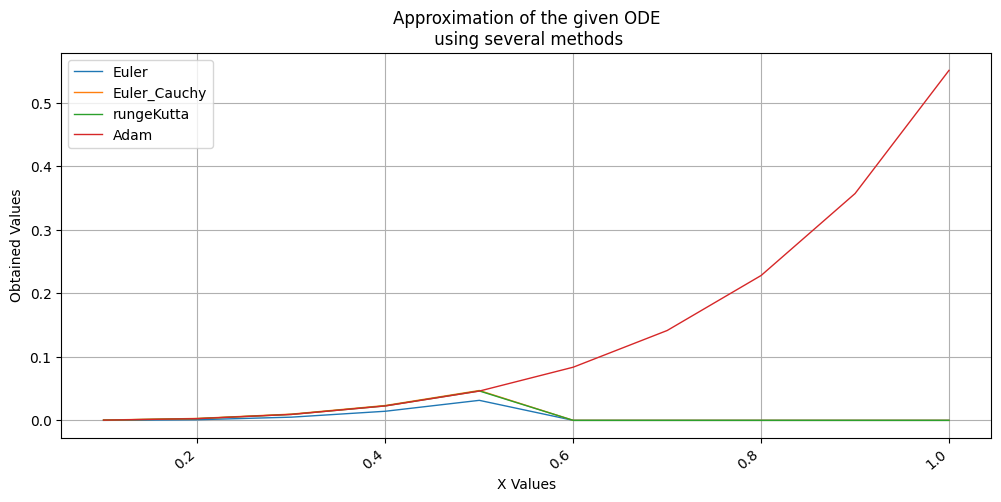

In [79]:
''' plotting the graph
    by default, matplotlib will auto-scale, which is why it hides some year labels, to unhide it you can try to set the MaxNLocator
'''

figure, axe = plt.subplots(figsize=(12,5))
sns.lineplot(data=working_df, y=working_df['Euler'], x=working_df['X_values'], palette="nipy_spectral", linewidth=1, ax=axe, label='Euler')
sns.lineplot(data=working_df, y=working_df['Euler_Cauchy'], x=working_df['X_values'], palette="nipy_spectral", linewidth=1, ax=axe, label='Euler_Cauchy')
sns.lineplot(data=working_df, y=working_df['rungeKutta'], x=working_df['X_values'], palette="nipy_spectral", linewidth=1, ax=axe, label='rungeKutta')
sns.lineplot(data=working_df, y=working_df['Adam'], x=working_df['X_values'], palette="nipy_spectral", linewidth=1, ax=axe, label='Adam')
axe.grid(True)
axe.set_xticklabels(axe.get_xticklabels(), rotation=40, horizontalalignment='right')
axe.set_title('Approximation of the given ODE\n using several methods', fontsize=12)
axe.set_xlabel('X Values', fontsize=10)
axe.set_ylabel('Obtained Values', fontsize=10)
plt.show()

